In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

## Importações de csv

In [2]:
xbox_achievements = pd.read_csv('dados/xbox/achievements.csv')
xbox_games = pd.read_csv('dados/xbox/games.csv')
xbox_players = pd.read_csv('dados/xbox/players.csv')
xbox_prices = pd.read_csv('dados/xbox/prices.csv')
xbox_purchased_games = pd.read_csv('dados/xbox/purchased_games.csv')
xbox_history = pd.read_csv('dados/xbox/history.csv')

In [3]:
playstation_achievements = pd.read_csv('dados/playstation/achievements.csv')
playstation_games = pd.read_csv('dados/playstation/games.csv')
playstation_players = pd.read_csv('dados/playstation/players.csv')
playstation_prices = pd.read_csv('dados/playstation/prices.csv')
playstation_purchased_games = pd.read_csv('dados/playstation/purchased_games.csv')
playstation_history = pd.read_csv('dados/playstation/history.csv')

In [4]:
steam_achievements = pd.read_csv('dados/steam/achievements.csv')
steam_games = pd.read_csv('dados/steam/games.csv')
steam_players = pd.read_csv('dados/steam/players.csv')
steam_prices = pd.read_csv('dados/steam/prices.csv')
steam_purchased_games = pd.read_csv('dados/steam/purchased_games.csv')
steam_private_steamids = pd.read_csv('dados/steam/private_steamids.csv')
steam_reviews = pd.read_csv('dados/steam/reviews.csv')
steam_friends = pd.read_csv('dados/steam/friends.csv')
steam_history = pd.read_csv('dados/steam/history.csv')

## Tratamento de dados

### Tratamento dos jogos comprados

In [5]:
import ast

xbox_purchased_games['library'] = xbox_purchased_games['library'].apply(ast.literal_eval)

xbox_purchased_games

,playerid,library
0,848738,"[14711, 2128, 10783, 9118, 7235, 9637, 717236,..."
1,848736,"[707376, 747223, 550303, 620354, 734202, 74678..."
2,1470783,"[638932, 32551, 748147, 468697, 446682, 615753..."
3,848735,"[736287, 555825, 717258, 422060, 12645, 550263..."
4,848739,"[698325, 443814, 745210, 747223, 734202, 71154..."
...,...,...
46461,698172,"[1225, 2937, 3597, 2114, 1142, 2152, 1186, 211..."
46462,606933,"[1240, 1529, 1209, 590826, 185285, 628210, 157..."
46463,776695,"[7756, 183346, 18204, 15414, 17177, 11501, 195..."
46464,3069400,"[755119, 12694, 550303, 19170, 176537, 648424,..."


In [6]:
import ast

playstation_purchased_games['library'] = playstation_purchased_games['library'].apply(ast.literal_eval)

playstation_purchased_games

,playerid,library
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12..."
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,..."
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167..."
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531..."
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41..."
...,...,...
46577,3753984,"[18141, 9459, 7779, 619584, 14339, 544742, 202..."
46578,1739644,"[141933, 333860, 8600, 20795, 7248, 167482, 44..."
46579,415935,"[550305, 417785, 420539, 417808, 550307, 14901..."
46580,210838,"[167482, 193795, 9020, 407954, 420948, 21135, ..."


In [7]:
import ast
steam_df = steam_purchased_games
steam_df = steam_df.dropna().copy()
steam_df['library'] = steam_df['library'].apply(ast.literal_eval)

steam_df

,playerid,library
0,76561198060698936,"[60, 1670, 3830, 1600, 2900, 2910, 2920, 4800,..."
1,76561198287452552,"[10, 80, 100, 240, 2990, 6880, 6910, 6920, 698..."
2,76561198040436563,"[10, 80, 100, 300, 20, 30, 40, 50, 60, 70, 130..."
3,76561198042412488,"[300, 240, 220, 320, 360, 4300, 4800, 4000, 61..."
4,76561198119605821,"[47870, 108600, 550, 271590, 331470, 381210, 2..."
...,...,...
102536,76561198403590435,"[10, 80, 100, 105600, 211500, 304930, 230410, ..."
102538,76561199086010469,"[254080, 282660, 397900, 470220, 544810, 730]"
102540,76561198001591961,"[70, 851850, 238960, 208650, 220, 320, 360, 42..."
102542,76561198860044842,"[10, 80, 100, 969020, 816020, 982150, 982520, ..."


### Analise de jogadores duplicados

In [9]:
df_conflict_clients = [steam_players, playstation_players, xbox_players]
df_conflict_clients = pd.concat(df_conflict_clients)
df_conflict_clients['playerid'].is_unique

True

### Tratamento de troféus

In [10]:
xbox_achievements['title'] = xbox_achievements['title'].fillna('no info')
xbox_achievements['description'] = xbox_achievements['description'].fillna('no info')
xbox_achievements['points'] = xbox_achievements['points'].fillna(0)
playstation_achievements['title'] = playstation_achievements['title'].fillna('no info')
playstation_achievements['description'] = playstation_achievements['description'].fillna('no info')

### Tratamento de jogos nulos

In [11]:
xnulls = xbox_games[['developers', 'publishers', 'genres', 'supported_languages']].isnull().mean() * 100
print(xnulls)

developers              5.491467
publishers              5.195920
genres                  5.767947
supported_languages    63.371151
dtype: float64


In [12]:
pnulls = playstation_games[['developers', 'publishers', 'genres', 'supported_languages']].isnull().mean() * 100
print(pnulls)

developers              0.073431
publishers              0.047514
genres                  0.613364
supported_languages    54.153168
dtype: float64


In [13]:
snulls = steam_games[['developers', 'publishers', 'genres', 'supported_languages']].isnull().mean() * 100
print(snulls)

developers             5.658130
publishers             6.046942
genres                 5.647952
supported_languages    5.604185
dtype: float64


In [14]:
xbox_games = xbox_games.dropna(subset=['developers', 'publishers', 'genres'])
xbox_games['supported_languages'] = xbox_games['supported_languages'].fillna('no info')

playstation_games = playstation_games.dropna(subset=['developers', 'publishers', 'genres'])
playstation_games['supported_languages'] = playstation_games['supported_languages'].fillna('no info')

steam_games = steam_games.dropna(subset=['developers', 'publishers', 'genres'])
steam_games['supported_languages'] = steam_games['supported_languages'].fillna('no info')

In [15]:
xnulls = xbox_games[['developers', 'publishers', 'genres', 'supported_languages']].isnull().mean() * 100
print(xnulls)

developers             0.0
publishers             0.0
genres                 0.0
supported_languages    0.0
dtype: float64


In [16]:
pnulls = xbox_games[['developers', 'publishers', 'genres', 'supported_languages']].isnull().mean() * 100
print(pnulls)

developers             0.0
publishers             0.0
genres                 0.0
supported_languages    0.0
dtype: float64


In [17]:
snulls = steam_games[['developers', 'publishers', 'genres', 'supported_languages']].isnull().mean() * 100
print(snulls)

developers             0.0
publishers             0.0
genres                 0.0
supported_languages    0.0
dtype: float64


### Tratamento de jogadores

In [18]:
steam_players['country'] = steam_players['country'].fillna('no info')
steam_players['created'] = steam_players['created'].fillna('no info')
xbox_players = xbox_players.dropna(subset=['playerid', 'nickname'])

### Tratamento de pagamento

In [19]:
coins_col = ['usd', 'eur', 'gbp', 'jpy', 'rub']

xmask = xbox_prices[coins_col].isnull().all(axis=1)
smask = steam_prices[coins_col].isnull().all(axis=1)
pmask = playstation_prices[coins_col].isnull().all(axis=1)

xbox_prices.loc[xmask, coins_col] = 0
steam_prices.loc[smask, coins_col] = 0
playstation_prices.loc[pmask, coins_col] = 0

xbox_prices['usd'] = xbox_prices['usd'].fillna(xbox_prices['eur'])
steam_prices['usd'] = steam_prices['usd'].fillna(steam_prices['eur'])
playstation_prices['usd'] = playstation_prices['usd'].fillna(playstation_prices['eur'])


In [20]:
conversion_rates = {
    'eur': 1.0,
    'gbp': 0.8,
    'jpy': 140.0,
    'rub': 88.64
}

for coin, tax in conversion_rates.items():
    xbox_prices[coin] = xbox_prices[coin].fillna(xbox_prices['usd'] * tax)


### Tratamento de jogos comprados

In [21]:
xbox_purchased_games['library'] = xbox_purchased_games['library'].fillna('no games')

### Tratamento de amizades

In [22]:
steam_friends['friends'] = steam_friends['friends'].fillna('no friends')

## 20 Jogos mais comprados xbox

In [23]:
xbox_games_purchased = xbox_purchased_games['library'].explode()
xbox_games_purchased = xbox_games_purchased.value_counts()
xbox_games_purchased = xbox_games_purchased.reset_index()
xbox_games_purchased.columns = ['gameid', 'num_players_purchased']


In [24]:
df_xbox_most_purchased_games = xbox_games_purchased.merge(
    xbox_games,
    on='gameid', 
    how='inner', 
    indicator=True
)

In [25]:
df_xbox_most_purchased_games = df_xbox_most_purchased_games.sort_values(
    by='num_players_purchased',
    ascending=False               
)
top_20_games = df_xbox_most_purchased_games.head(20)


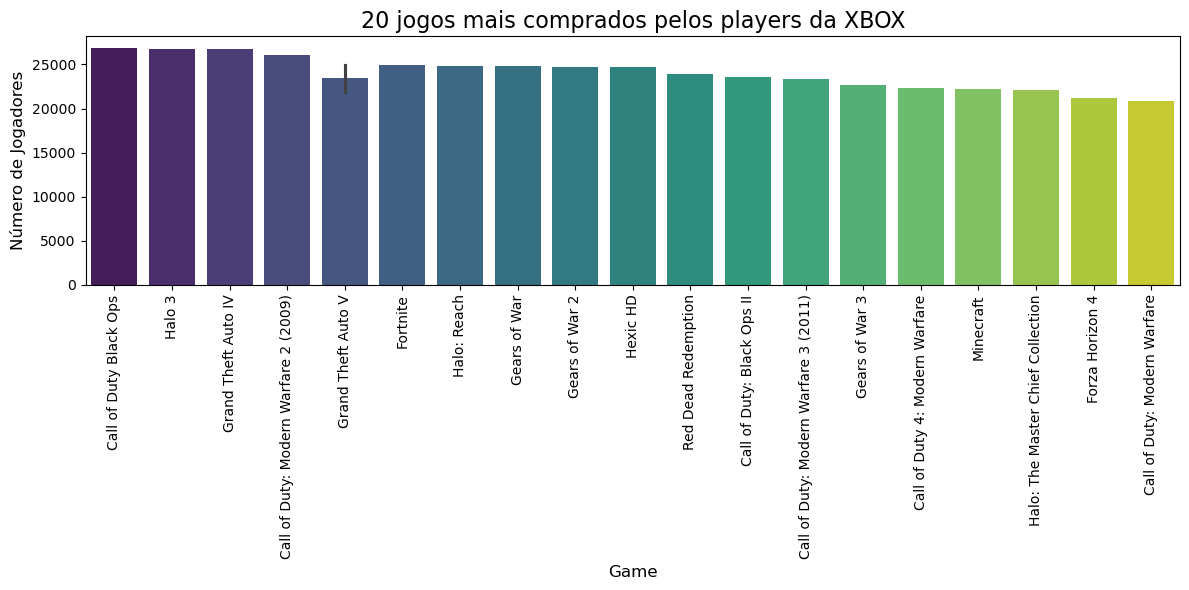

In [26]:
plt.figure(figsize=(12, 6))
sn.barplot(
    x='title',
    y='num_players_purchased',
    hue='title',
    data=top_20_games,
    palette='viridis',
    legend=False
)

plt.title('20 jogos mais comprados pelos players da XBOX', fontsize=16)
plt.xlabel('Game', fontsize=12)
plt.ylabel('Número de Jogadores', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Jogos mais comprados Playstation

In [27]:
playstation_games_purchased = playstation_purchased_games['library'].explode()
playstation_games_purchased = playstation_games_purchased.value_counts()
playstation_games_purchased = playstation_games_purchased.reset_index()
playstation_games_purchased.columns = ['gameid', 'num_players_purchased']

In [28]:
df_playstation_most_purchased_games = playstation_games_purchased.merge(
    playstation_games,
    on='gameid', 
    how='inner', 
    indicator=True
)

In [29]:
df_conflict_clients = steam_players.merge(
    xbox_players[['playerid']],
    on='playerid',
    how='inner',
    indicator=True
).merge(
    playstation_players[['playerid']],
    on='playerid',
    how='inner'
)

In [30]:
df_playstation_most_purchased_games = df_playstation_most_purchased_games.sort_values(
    by='num_players_purchased', 
    ascending=False             
)
top_playstation_20_games = df_playstation_most_purchased_games.head(20)

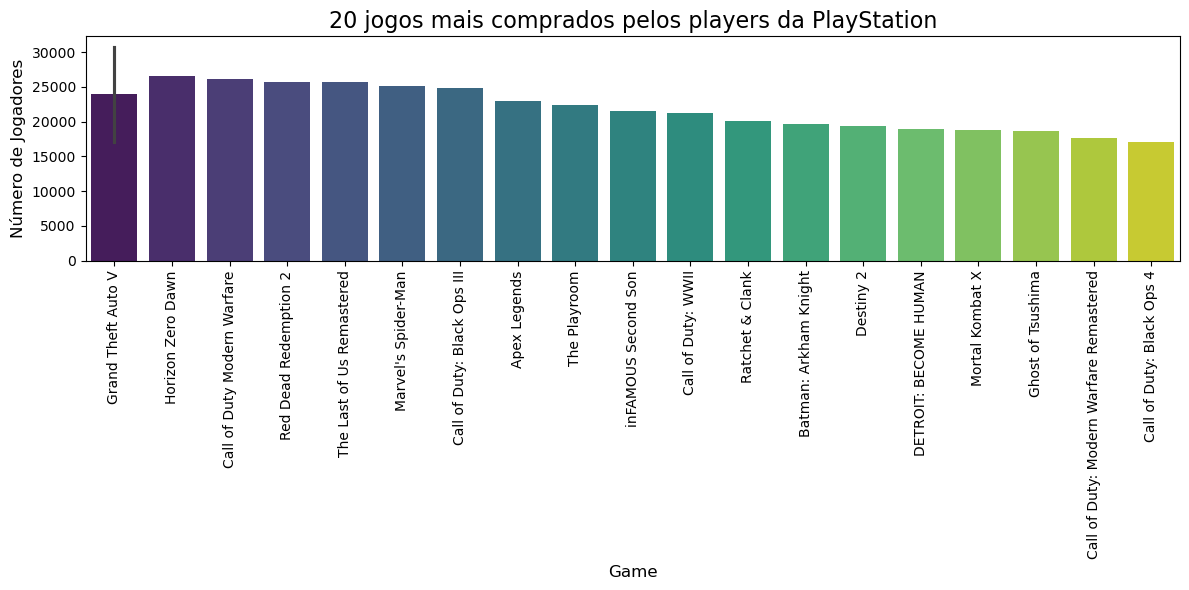

In [31]:
plt.figure(figsize=(12, 6))  
sn.barplot(
    x='title',  
    y='num_players_purchased', 
    hue='title',
    data=top_playstation_20_games, 
    palette='viridis',
    legend=False
)

plt.title('20 jogos mais comprados pelos players da PlayStation', fontsize=16)
plt.xlabel('Game', fontsize=12)
plt.ylabel('Número de Jogadores', fontsize=12)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## 20 Jogos mais baixados steam

In [32]:
steam_games_purchased = steam_df['library'].explode()
steam_games_purchased = steam_games_purchased.value_counts()
steam_games_purchased = steam_games_purchased.reset_index()
steam_games_purchased.columns = ['gameid', 'num_players_purchased']

In [33]:
steam_games_purchased

,gameid,num_players_purchased
0,730,43967
1,578080,28356
2,550,24727
3,218620,23785
4,304930,21620
...,...,...
40983,747130,1
40984,1041710,1
40985,744890,1
40986,740740,1


In [34]:
steam_games_purchased.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40988 entries, 0 to 40987
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gameid                 40988 non-null  int64
 1   num_players_purchased  40988 non-null  int64
dtypes: int64(2)
memory usage: 640.6 KB


In [35]:
steam_games_purchased['gameid'] = steam_games_purchased['gameid'].astype(str)
steam_games['gameid'] = steam_games['gameid'].astype(str)
df_steam_most_purchased_games = steam_games_purchased.merge(
    steam_games,
    on='gameid', 
    how='inner', 
    indicator=True
)

In [36]:
df_steam_most_purchased_games = df_steam_most_purchased_games.sort_values(
    by='num_players_purchased',  
    ascending=False              
)
top_steam_20_games = df_steam_most_purchased_games.head(20)

In [37]:
df_steam_most_purchased_games

,gameid,num_players_purchased,title,developers,publishers,genres,supported_languages,release_date,_merge
0,730,43967,Counter-Strike 2,['Valve'],['Valve'],"['Action', 'Free To Play']","['Czech', 'Danish', 'Dutch', 'English', 'Finni...",2012-08-21,both
1,578080,28356,PUBG: BATTLEGROUNDS,['PUBG Corporation'],"['KRAFTON, Inc.']","['Action', 'Adventure', 'Massively Multiplayer...","['English', 'Korean', 'Simplified Chinese', 'F...",2017-12-21,both
2,550,24727,Left 4 Dead 2,['Valve'],['Valve'],['Action'],"['Danish', 'Dutch', 'English', 'Finnish', 'Fre...",2009-11-16,both
3,218620,23785,PAYDAY 2,['OVERKILL - a Starbreeze Studio.'],['Starbreeze Publishing AB'],"['Action', 'RPG']","['English', 'German', 'French', 'Italian', 'Sp...",2013-08-13,both
4,304930,21620,Unturned,['Smartly Dressed Games'],['Smartly Dressed Games'],"['Action', 'Adventure', 'Casual', 'Indie', 'Fr...",['English'],2017-07-07,both
...,...,...,...,...,...,...,...,...,...
36226,2897180,1,Rebellion! Riot of Jisr Village!,['ぽんこん堂'],['072 Project'],"['Action', 'Adventure', 'Indie', 'RPG']","['Japanese', 'English', 'Simplified Chinese', ...",2024-09-13,both
36227,2122110,1,VDoll,['FoxPunch'],['FoxPunch'],"['Simulation', 'Early Access']","['English', 'Japanese']",2022-11-14,both
36228,1512830,1,黑巢姐妹,['StellarXiela'],['StellarXiela'],"['Casual', 'Indie', 'RPG']",['Simplified Chinese'],2023-12-04,both
36229,2327780,1,HAELE 3D - Feet Poses Pro - Drawing References,['Ige Olwen'],['HAELE 3D'],"['Adventure', 'Simulation']","['English', 'Spanish - Spain', 'Japanese', 'Ru...",2024-04-12,both


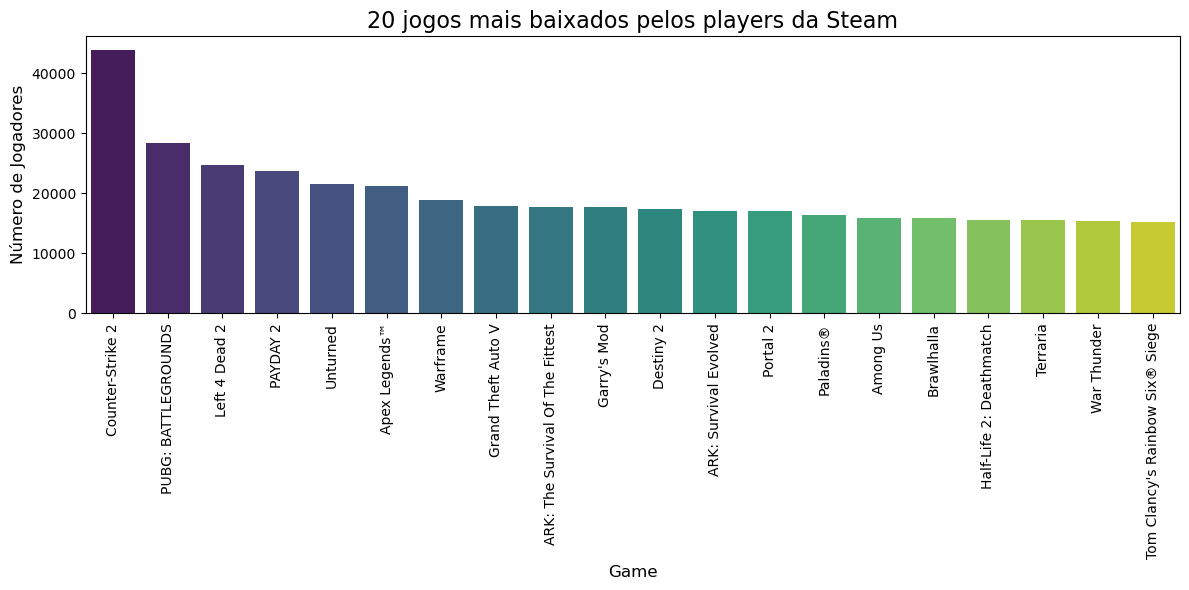

In [38]:
plt.figure(figsize=(12, 6))
sn.barplot(
    x='title',
    y='num_players_purchased',
    hue='title',
    data=top_steam_20_games,
    palette='viridis',
    legend=False
)

plt.title('20 jogos mais baixados pelos players da Steam', fontsize=16)
plt.xlabel('Game', fontsize=12)
plt.ylabel('Número de Jogadores', fontsize=12)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Tomada de decisão 1: Bundle de Jogo Caro + Baratos

In [39]:
steam_prices['date_acquired'] = pd.to_datetime(steam_prices['date_acquired'], format='%Y-%m-%d')

In [40]:
df_recent_price = steam_prices.sort_values(by="date_acquired").drop_duplicates('gameid', keep='last')

In [41]:
df_steam_most_purchased_games['gameid'] = df_steam_most_purchased_games['gameid'].astype(int)
df_steam_most_purchased_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36658 entries, 0 to 36657
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gameid                 36658 non-null  int32   
 1   num_players_purchased  36658 non-null  int64   
 2   title                  36658 non-null  object  
 3   developers             36658 non-null  object  
 4   publishers             36658 non-null  object  
 5   genres                 36658 non-null  object  
 6   supported_languages    36658 non-null  object  
 7   release_date           36658 non-null  object  
 8   _merge                 36658 non-null  category
dtypes: category(1), int32(1), int64(1), object(6)
memory usage: 2.4+ MB


In [42]:
df_popularity_price = df_steam_most_purchased_games.merge(
    df_recent_price,
    on='gameid', 
    how='inner'
)

In [43]:
df_popularity_price

,gameid,num_players_purchased,title,developers,publishers,genres,supported_languages,release_date,_merge,usd,eur,gbp,jpy,rub,date_acquired
0,730,43967,Counter-Strike 2,['Valve'],['Valve'],"['Action', 'Free To Play']","['Czech', 'Danish', 'Dutch', 'English', 'Finni...",2012-08-21,both,0.00,0.00,0.00,0.0,0.0,2025-02-24
1,578080,28356,PUBG: BATTLEGROUNDS,['PUBG Corporation'],"['KRAFTON, Inc.']","['Action', 'Adventure', 'Massively Multiplayer...","['English', 'Korean', 'Simplified Chinese', 'F...",2017-12-21,both,0.00,0.00,0.00,0.0,0.0,2025-02-24
2,550,24727,Left 4 Dead 2,['Valve'],['Valve'],['Action'],"['Danish', 'Dutch', 'English', 'Finnish', 'Fre...",2009-11-16,both,9.99,9.75,8.50,1200.0,385.0,2025-02-24
3,218620,23785,PAYDAY 2,['OVERKILL - a Starbreeze Studio.'],['Starbreeze Publishing AB'],"['Action', 'RPG']","['English', 'German', 'French', 'Italian', 'Sp...",2013-08-13,both,9.99,9.99,8.50,1200.0,385.0,2025-02-24
4,304930,21620,Unturned,['Smartly Dressed Games'],['Smartly Dressed Games'],"['Action', 'Adventure', 'Casual', 'Indie', 'Fr...",['English'],2017-07-07,both,0.00,0.00,0.00,0.0,0.0,2025-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36653,2897180,1,Rebellion! Riot of Jisr Village!,['ぽんこん堂'],['072 Project'],"['Action', 'Adventure', 'Indie', 'RPG']","['Japanese', 'English', 'Simplified Chinese', ...",2024-09-13,both,8.99,NaN,7.49,1000.0,350.0,2025-02-24
36654,2122110,1,VDoll,['FoxPunch'],['FoxPunch'],"['Simulation', 'Early Access']","['English', 'Japanese']",2022-11-14,both,8.99,NaN,7.49,1000.0,350.0,2025-02-24
36655,1512830,1,黑巢姐妹,['StellarXiela'],['StellarXiela'],"['Casual', 'Indie', 'RPG']",['Simplified Chinese'],2023-12-04,both,11.99,11.79,9.99,1400.0,460.0,2025-02-24
36656,2327780,1,HAELE 3D - Feet Poses Pro - Drawing References,['Ige Olwen'],['HAELE 3D'],"['Adventure', 'Simulation']","['English', 'Spanish - Spain', 'Japanese', 'Ru...",2024-04-12,both,29.99,28.99,24.99,3400.0,1100.0,2025-02-24


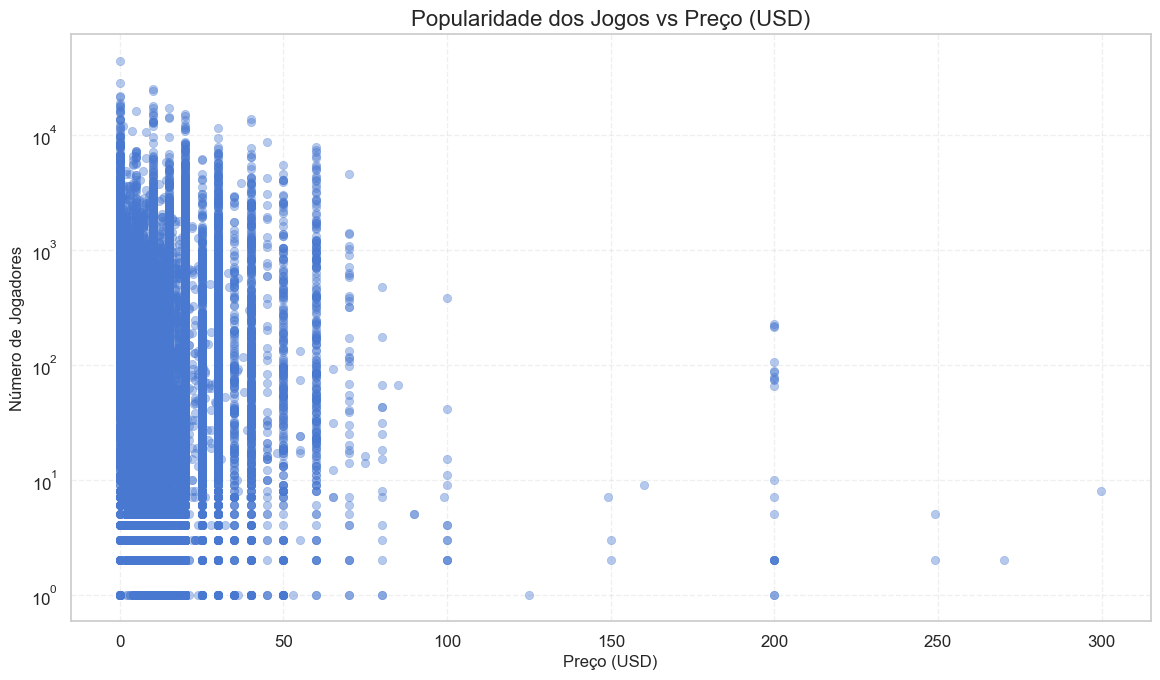

In [44]:
sn.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.figure(figsize=(12, 7))

sn.scatterplot(
    data=df_popularity_price,
    x='usd',
    y='num_players_purchased',
    alpha=0.4,
    edgecolor=None
)
plt.title('Popularidade dos Jogos vs Preço (USD)', fontsize=16)
plt.xlabel('Preço (USD)', fontsize=12)
plt.ylabel('Número de Jogadores', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.yscale('log')

plt.show()

In [45]:
df_popularity_price.query('usd >= 150.00')

,gameid,num_players_purchased,title,developers,publishers,genres,supported_languages,release_date,_merge,usd,eur,gbp,jpy,rub,date_acquired
9082,652230,227,CrazyCar,['Apillo'],['Apillo'],"['Adventure', 'Casual', 'Indie', 'Racing', 'Si...","['English', 'Japanese', 'Simplified Chinese', ...",2017-07-27,both,199.99,194.99,167.99,22000.0,6500.0,2025-02-24
9479,833300,216,Fantasyland,['Apillo'],['Apillo'],"['Action', 'Adventure', 'Indie', 'RPG', 'Strat...",['English'],2018-04-21,both,199.99,194.99,167.99,22000.0,6500.0,2025-02-24
9545,773650,214,The first thrust of God,['Apillo'],['Apillo'],"['Adventure', 'Casual', 'Indie', 'Simulation',...",['English'],2018-01-03,both,199.99,194.99,167.99,22000.0,6500.0,2025-02-24
15524,845200,106,❂ Hexaluga ❂ Weapon and Shield ☯,"['Hede', 'Hexaluga mines']",['Hede'],"['Action', 'Adventure', 'Casual', 'Indie', 'Ra...","['English', 'French', 'Italian', 'German', 'Sp...",2018-05-14,both,199.99,194.99,167.99,22000.0,6500.0,2025-02-24
16846,860670,88,❂ Hexaluga ❂ Dungeons and Hunting ☠,"['Hede', 'Hexaluga mines']",['Hede'],"['Action', 'Adventure', 'Casual', 'Indie', 'RP...","['English', 'French', 'Italian', 'German', 'Sp...",2018-05-22,both,199.99,194.99,167.99,22000.0,6500.0,2025-02-24
17025,809450,86,❂ Hexaluga ❂ Witch Hunter's Travelling Castle ♉,"['Hede', 'Hexaluga mines']",['Hede'],"['Action', 'Adventure', 'Casual', 'Indie', 'Ma...","['English', 'French', 'Italian', 'German', 'Sp...",2018-03-12,both,199.99,194.99,167.99,22000.0,6500.0,2025-02-24
17668,763300,78,GAME TUBE ♛,['Hede'],['Hede'],"['Action', 'Adventure', 'Casual', 'Indie', 'Ra...","['English', 'French', 'German', 'Spanish - Spa...",2018-05-15,both,199.99,194.99,167.99,22000.0,6500.0,2025-02-24
17863,789220,75,★ Fallalypse ★ Death or Cress ♝,"['Hede', 'Fallalypse studio']",['Hede'],"['Action', 'Adventure', 'Casual', 'Indie', 'RP...","['English', 'French', 'German', 'Spanish - Spa...",2018-02-06,both,199.99,194.99,167.99,22000.0,6500.0,2025-02-24
17931,689520,74,★ Fallalypse ★,"['Hede', 'Fallalypse studio']",['Hede'],"['Action', 'Adventure', 'Casual', 'Indie', 'Ma...","['English', 'Japanese', 'Russian', 'Traditiona...",2017-09-12,both,199.99,194.99,167.99,22000.0,6500.0,2025-02-24
18752,728050,65,❂ Heroes of Hexaluga ❂,"['Hede', 'Hexaluga mines']",['Hede'],"['Action', 'Adventure', 'Casual', 'Indie', 'Ma...","['English', 'French', 'German', 'Spanish - Spa...",2017-11-20,both,199.99,194.99,167.99,22000.0,6500.0,2025-02-24


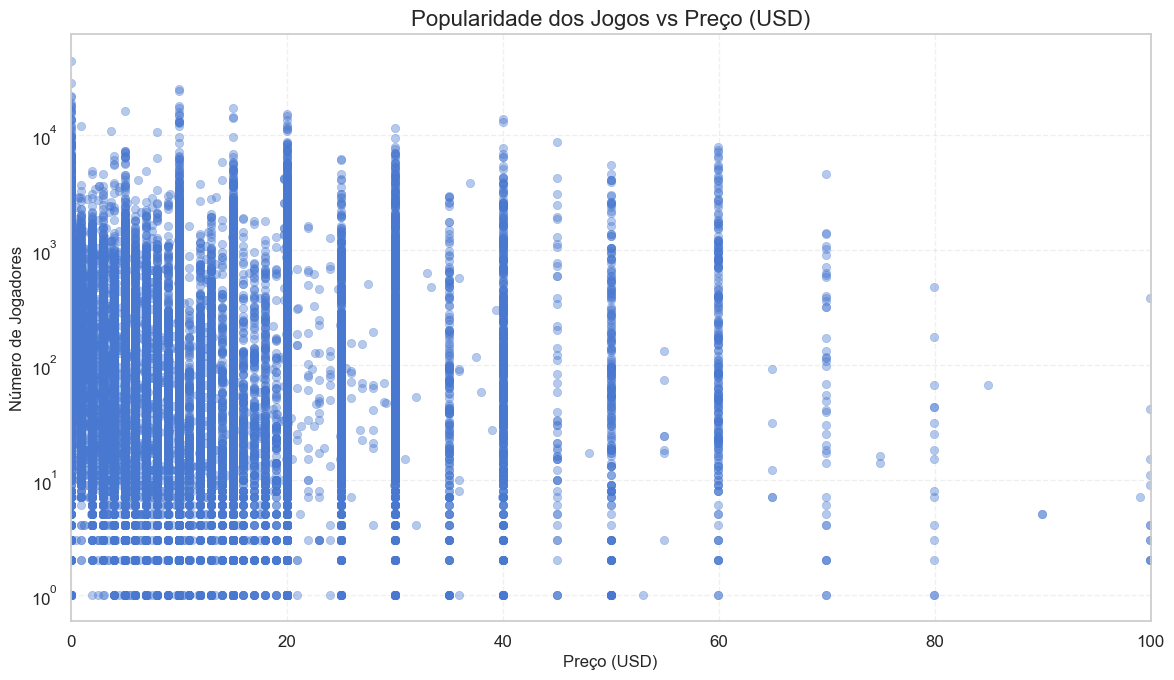

In [46]:
sn.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.figure(figsize=(12, 7))

sn.scatterplot(
    data=df_popularity_price,
    x='usd',
    y='num_players_purchased',
    alpha=0.4,
    edgecolor=None
)
plt.title('Popularidade dos Jogos vs Preço (USD)', fontsize=16)
plt.xlabel('Preço (USD)', fontsize=12)
plt.ylabel('Número de Jogadores', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.xlim(0, 100)
plt.yscale('log')

plt.show()

#### • Existe um limite psicológico para preços
#### • Acima de 60 dólares, jogos ficam menos populares
#### • Jogos entre 0 e 20 dólares são os mais populares
#### • Acima de 100 reais, o foco costuma ser software profissional ou pacotes de jogos

In [47]:
df_bundle_candidates = df_popularity_price[(df_popularity_price['usd'] > 30) & (df_popularity_price['num_players_purchased'] > 500)]
print(f"Jogos candidatos a bundles: {len(df_bundle_candidates)} títulos")

Jogos candidatos a bundles: 272 títulos


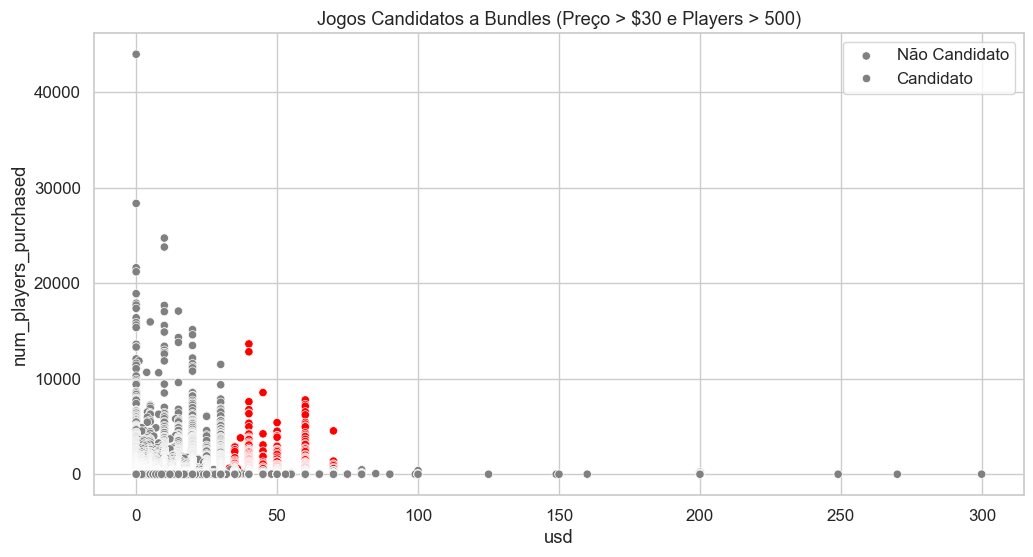

In [48]:
plt.figure(figsize=(12, 6))
sn.scatterplot(
    data=df_popularity_price, 
    x='usd', 
    y='num_players_purchased',
    hue=df_popularity_price['gameid'].isin(df_bundle_candidates['gameid']), 
    palette=['grey', 'red']
)
plt.title('Jogos Candidatos a Bundles (Preço > $30 e Players > 500)')
plt.legend(['Não Candidato', 'Candidato'])
plt.show()


#### • Tomada de decisão: Combos com jogos caros e baratos
#### • Métricas: Bundles populares com 25–30% de desconto

## Tomada de decisão 2: Sessão de custo-benefício

In [49]:
df_steam_cost_benefit = df_popularity_price

df_steam_cost_benefit['value_score'] = np.where(
    df_steam_cost_benefit['usd'] > 0,
    df_steam_cost_benefit['num_players_purchased'] / df_steam_cost_benefit['usd'],
    df_steam_cost_benefit['num_players_purchased'] / (df_steam_cost_benefit['usd'] + 1)
)

df_steam_cost_benefit

,gameid,num_players_purchased,title,developers,publishers,genres,supported_languages,release_date,_merge,usd,eur,gbp,jpy,rub,date_acquired,value_score
0,730,43967,Counter-Strike 2,['Valve'],['Valve'],"['Action', 'Free To Play']","['Czech', 'Danish', 'Dutch', 'English', 'Finni...",2012-08-21,both,0.00,0.00,0.00,0.0,0.0,2025-02-24,43967.000000
1,578080,28356,PUBG: BATTLEGROUNDS,['PUBG Corporation'],"['KRAFTON, Inc.']","['Action', 'Adventure', 'Massively Multiplayer...","['English', 'Korean', 'Simplified Chinese', 'F...",2017-12-21,both,0.00,0.00,0.00,0.0,0.0,2025-02-24,28356.000000
2,550,24727,Left 4 Dead 2,['Valve'],['Valve'],['Action'],"['Danish', 'Dutch', 'English', 'Finnish', 'Fre...",2009-11-16,both,9.99,9.75,8.50,1200.0,385.0,2025-02-24,2475.175175
3,218620,23785,PAYDAY 2,['OVERKILL - a Starbreeze Studio.'],['Starbreeze Publishing AB'],"['Action', 'RPG']","['English', 'German', 'French', 'Italian', 'Sp...",2013-08-13,both,9.99,9.99,8.50,1200.0,385.0,2025-02-24,2380.880881
4,304930,21620,Unturned,['Smartly Dressed Games'],['Smartly Dressed Games'],"['Action', 'Adventure', 'Casual', 'Indie', 'Fr...",['English'],2017-07-07,both,0.00,0.00,0.00,0.0,0.0,2025-02-24,21620.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36653,2897180,1,Rebellion! Riot of Jisr Village!,['ぽんこん堂'],['072 Project'],"['Action', 'Adventure', 'Indie', 'RPG']","['Japanese', 'English', 'Simplified Chinese', ...",2024-09-13,both,8.99,NaN,7.49,1000.0,350.0,2025-02-24,0.111235
36654,2122110,1,VDoll,['FoxPunch'],['FoxPunch'],"['Simulation', 'Early Access']","['English', 'Japanese']",2022-11-14,both,8.99,NaN,7.49,1000.0,350.0,2025-02-24,0.111235
36655,1512830,1,黑巢姐妹,['StellarXiela'],['StellarXiela'],"['Casual', 'Indie', 'RPG']",['Simplified Chinese'],2023-12-04,both,11.99,11.79,9.99,1400.0,460.0,2025-02-24,0.083403
36656,2327780,1,HAELE 3D - Feet Poses Pro - Drawing References,['Ige Olwen'],['HAELE 3D'],"['Adventure', 'Simulation']","['English', 'Spanish - Spain', 'Japanese', 'Ru...",2024-04-12,both,29.99,28.99,24.99,3400.0,1100.0,2025-02-24,0.033344


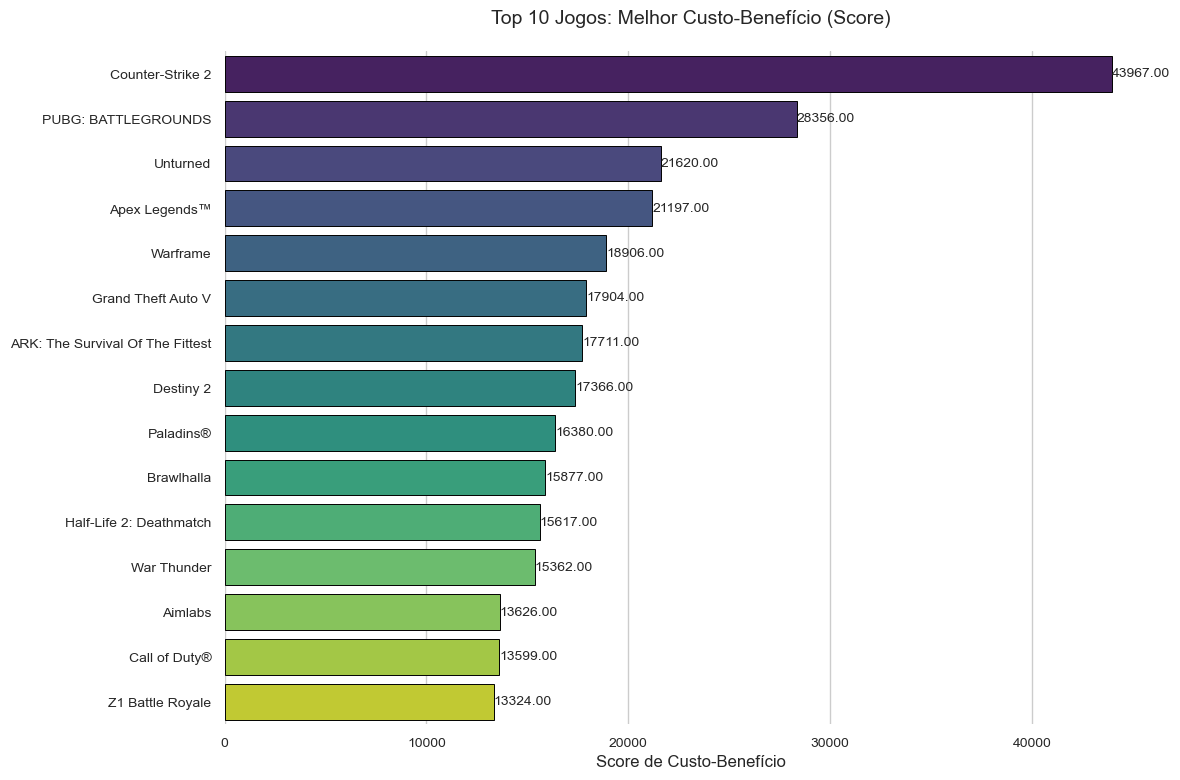

In [50]:
plt.figure(figsize=(12, 8))
sn.set_style("whitegrid")    

top_value = df_steam_cost_benefit.sort_values('value_score', ascending=False).head(15)

barplot = sn.barplot(
    data=top_value,
    y='title', 
    x='value_score',
    hue='title',
    palette="viridis",  
    edgecolor="black", 
    linewidth=0.7,
    legend=False
)

for i, score in enumerate(top_value['value_score']):
    plt.text(score + 0.05, i, f"{score:.2f}", va='center', fontsize=10)  

plt.title("Top 10 Jogos: Melhor Custo-Benefício (Score)", pad=20, fontsize=14)
plt.xlabel("Score de Custo-Benefício", fontsize=12)
plt.ylabel("")  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10) 

sn.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [51]:
df_steam_cost_benefit = df_popularity_price[df_popularity_price['usd'] > 0].copy()
df_steam_cost_benefit['value_score'] = df_popularity_price['num_players_purchased'] / (df_popularity_price['usd'])
df_steam_cost_benefit

,gameid,num_players_purchased,title,developers,publishers,genres,supported_languages,release_date,_merge,usd,eur,gbp,jpy,rub,date_acquired,value_score
2,550,24727,Left 4 Dead 2,['Valve'],['Valve'],['Action'],"['Danish', 'Dutch', 'English', 'Finnish', 'Fre...",2009-11-16,both,9.99,9.75,8.50,1200.0,385.0,2025-02-24,2475.175175
3,218620,23785,PAYDAY 2,['OVERKILL - a Starbreeze Studio.'],['Starbreeze Publishing AB'],"['Action', 'RPG']","['English', 'German', 'French', 'Italian', 'Sp...",2013-08-13,both,9.99,9.99,8.50,1200.0,385.0,2025-02-24,2380.880881
9,4000,17676,Garry's Mod,['Facepunch Studios'],['Valve'],"['Casual', 'Indie', 'Simulation']","['English', 'French', 'Italian', 'German', 'Sp...",2006-11-29,both,9.99,9.99,6.99,980.0,750.0,2025-02-24,1769.369369
11,346110,17082,ARK: Survival Evolved,"['Studio Wildcard', 'Instinct Games', 'Efecto ...","['Studio Wildcard', 'Snail Games USA']","['Action', 'Adventure', 'Indie', 'Massively Mu...","['English', 'French', 'Italian', 'German', 'Sp...",2017-08-27,both,14.99,14.79,12.79,1700.0,550.0,2025-02-24,1139.559706
12,620,17026,Portal 2,['Valve'],['Valve'],"['Action', 'Adventure']","['English', 'French', 'German', 'Spanish - Spa...",2011-04-18,both,9.99,9.75,8.50,1200.0,385.0,2025-02-24,1704.304304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36652,878880,1,AnyTime Organizer Deluxe 16,['Individual Software'],['Individual Software'],['Education'],['English'],2018-11-01,both,39.99,33.99,30.99,4100.0,725.0,2025-02-24,0.025006
36653,2897180,1,Rebellion! Riot of Jisr Village!,['ぽんこん堂'],['072 Project'],"['Action', 'Adventure', 'Indie', 'RPG']","['Japanese', 'English', 'Simplified Chinese', ...",2024-09-13,both,8.99,NaN,7.49,1000.0,350.0,2025-02-24,0.111235
36654,2122110,1,VDoll,['FoxPunch'],['FoxPunch'],"['Simulation', 'Early Access']","['English', 'Japanese']",2022-11-14,both,8.99,NaN,7.49,1000.0,350.0,2025-02-24,0.111235
36655,1512830,1,黑巢姐妹,['StellarXiela'],['StellarXiela'],"['Casual', 'Indie', 'RPG']",['Simplified Chinese'],2023-12-04,both,11.99,11.79,9.99,1400.0,460.0,2025-02-24,0.083403


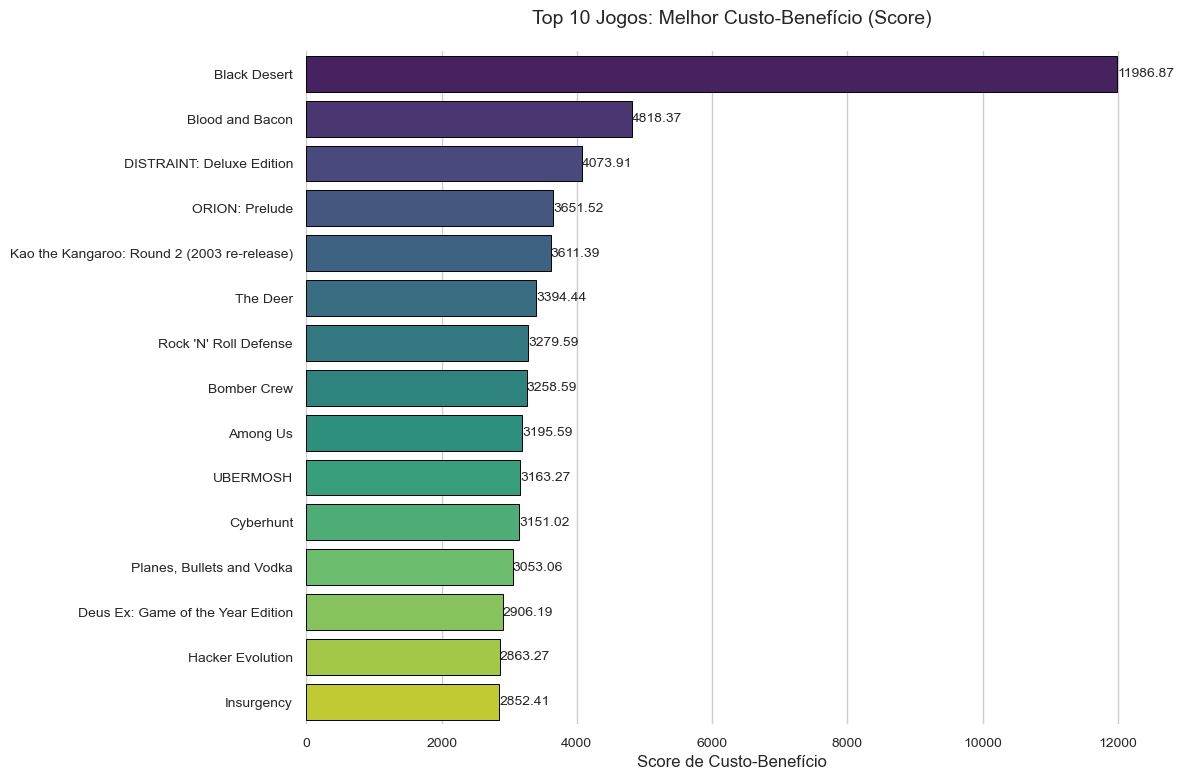

In [52]:
plt.figure(figsize=(12, 8)) 
sn.set_style("whitegrid")   

top_value = df_steam_cost_benefit.sort_values('value_score', ascending=False).head(15)

barplot = sn.barplot(
    data=top_value,
    y='title',  
    x='value_score',
    hue='title',
    palette="viridis",
    edgecolor="black",  
    linewidth=0.7,
    legend=False
)

for i, score in enumerate(top_value['value_score']):
    plt.text(score + 0.05, i, f"{score:.2f}", va='center', fontsize=10)  

plt.title("Top 10 Jogos: Melhor Custo-Benefício (Score)", pad=20, fontsize=14)
plt.xlabel("Score de Custo-Benefício", fontsize=12)
plt.ylabel("")  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  

sn.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

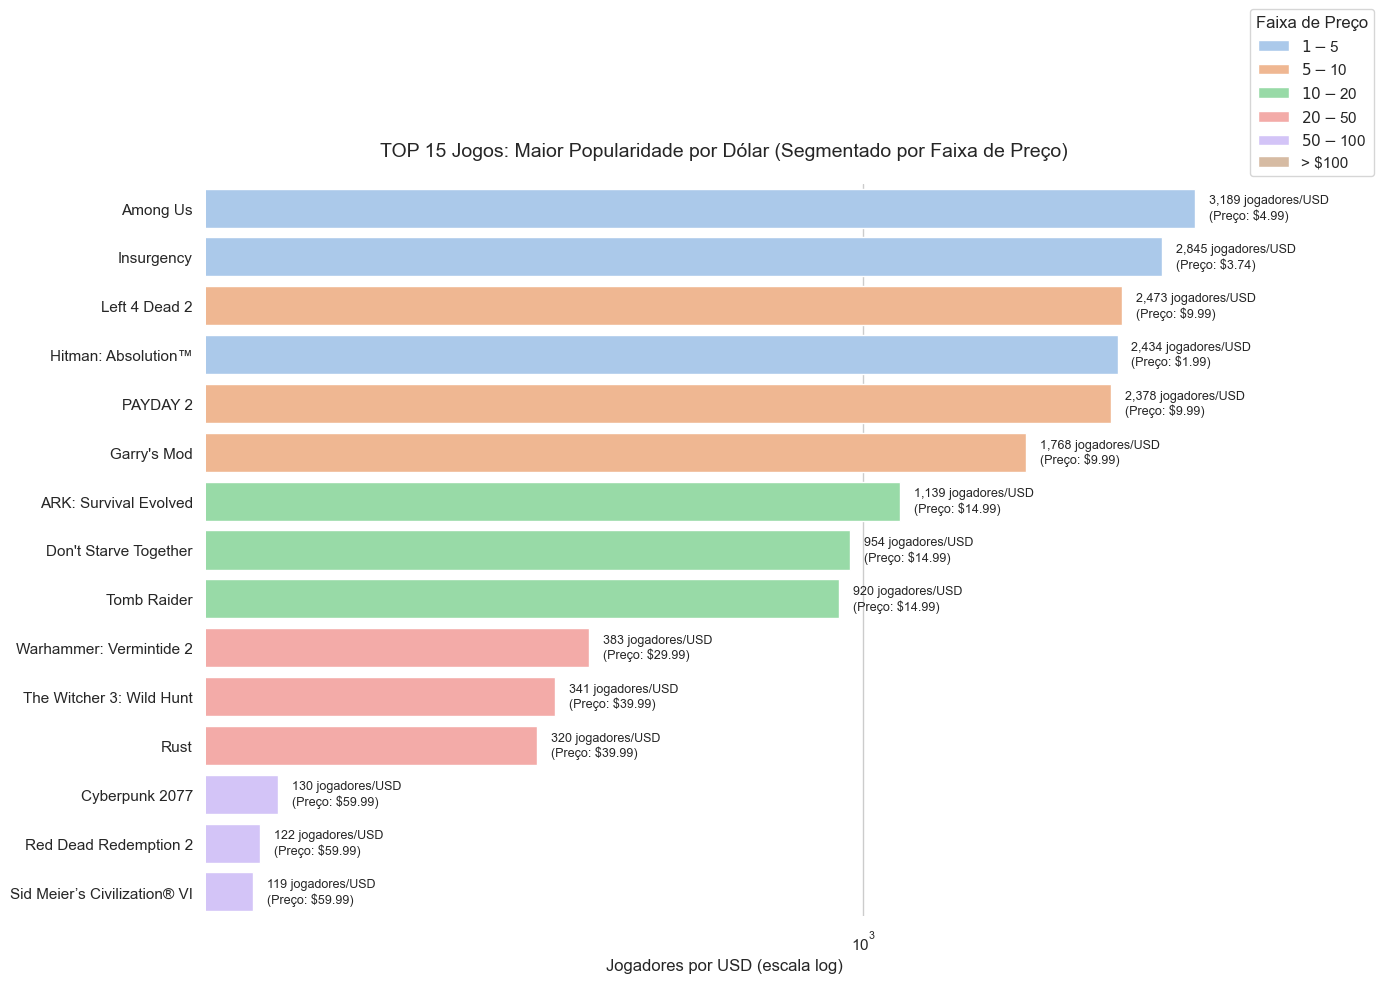

In [53]:
df = df_popularity_price.copy()

df['players_per_usd'] = df['num_players_purchased'] / (df['usd'] + 0.01)  
df['price_range'] = pd.cut(df['usd'], 
                          bins=[1, 5, 10, 20, 50, 100, np.inf],
                          labels=['$1-$5', '$5-$10', '$10-$20', '$20-$50', '$50-$100', '> $100'])

top_15 = df.sort_values('players_per_usd', ascending=False).groupby('price_range', observed=True).head(3).nlargest(15, 'players_per_usd')

plt.figure(figsize=(14, 10))
sn.set_theme(style="whitegrid", palette="pastel")

barplot = sn.barplot(
    data=top_15,
    y='title',
    x='players_per_usd',
    hue='price_range',
    dodge=False,
    estimator=np.median,
    errorbar=None
)

plt.title('TOP 15 Jogos: Maior Popularidade por Dólar (Segmentado por Faixa de Preço)', pad=20, fontsize=14)
plt.xlabel('Jogadores por USD (escala log)', fontsize=12)
plt.ylabel('', fontsize=12)
plt.xscale('log') 

for i, (_, row) in enumerate(top_15.iterrows()):
    plt.text(row['players_per_usd'] * 1.05, i, 
             f"{row['players_per_usd']:,.0f} jogadores/USD\n(Preço: ${row['usd']:.2f})", 
             va='center', fontsize=9)

plt.legend(title='Faixa de Preço', bbox_to_anchor=(1, 1))
sn.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [54]:
top_5_cheap = top_15[top_15['price_range'].isin(['$1-$5', '$5-$10', '$10-$20'])].head(5)
display(top_5_cheap[['title', 'usd', 'players_per_usd']])

,title,usd,players_per_usd
14,Among Us,4.99,3189.2
49,Insurgency,3.74,2844.8
2,Left 4 Dead 2,9.99,2472.7
206,Hitman: Absolution™,1.99,2433.5
3,PAYDAY 2,9.99,2378.5


#### • Tomada de decisão: Seção "Melhor Custo-Benefício" para jogos até $20
#### • Métricas: Visibilidade aumentar 30% em 2 meses (medido por cliques)

## Tomada de decisão 3: Parceria Estratégica com Desenvolvedoras pequenas de alta performance

In [55]:
import ast
from collections import Counter

xbox_prices['date_acquired'] = pd.to_datetime(xbox_prices['date_acquired'], format='%Y-%m-%d')

def safe_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

df_xbox_recent = xbox_prices.sort_values(by="date_acquired").drop_duplicates('gameid', keep='last')

df_xbox_recent['purchase_month'] = df_xbox_recent['date_acquired'].dt.month_name()

df_xbox_popular_genres = df_xbox_most_purchased_games.merge(
    df_xbox_recent,
    on='gameid', 
    how='inner'
)

df_xbox_popular_genres['genres'] = df_xbox_popular_genres['genres'].str.lower()

df_xbox_popular_genres['genres'] = df_xbox_popular_genres['genres'].apply(safe_eval)
genres = df_xbox_popular_genres.explode('genres')['genres'].reset_index(drop=True)
genre_counts = Counter(genres)
print(genre_counts.most_common(20))


[('adventure', 1936), ('action', 1532), ('platformer', 1038), ('puzzle', 814), ('sports', 782), ('strategy', 770), ('indie', 640), ('simulation', 592), ('shooter', 470), ('role playing', 372), ("shoot 'em up", 340), ('turn based', 334), ('fighting', 289), ('management', 281), ('racing', 264), ('family', 249), ('action-adventure', 246), ('flying', 225), ('roguelite', 218), ('first person shooter', 199)]


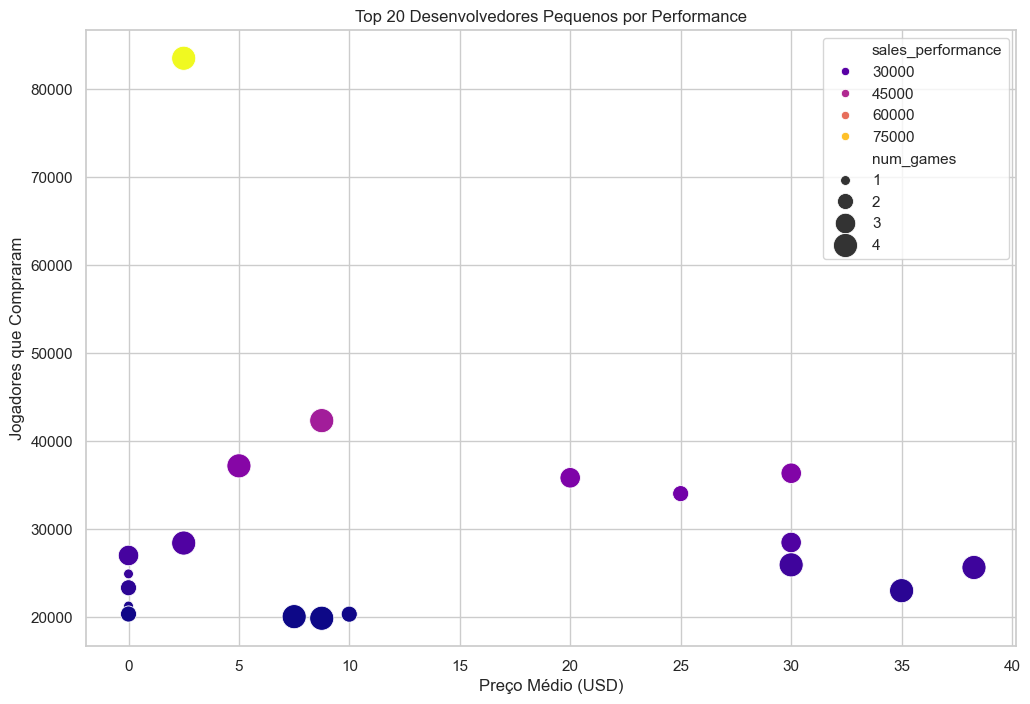

In [56]:
developer_stats = df_xbox_popular_genres.explode('developers').groupby('developers').agg(
    num_games=('gameid', 'nunique'),
    avg_price=('usd', 'mean'),
    sales_performance=('num_players_purchased', 'sum')
).reset_index()

small_devs = developer_stats[developer_stats['num_games'] < 5].sort_values('sales_performance', ascending=False)

plt.figure(figsize=(12,8))
sn.scatterplot(
    data=small_devs.head(20),
    x='avg_price',
    y='sales_performance',
    size='num_games',
    hue='sales_performance',
    sizes=(50, 300),
    palette='plasma'
)
plt.title('Top 20 Desenvolvedores Pequenos por Performance')
plt.xlabel('Preço Médio (USD)')
plt.ylabel('Jogadores que Compraram')
plt.show()

#### • Tomada de decisão: Parceria com desenvolvedoras niche de alta performance  
#### • Métricas: fechar 30% de contratos de exclusividade dos top 10. ROI das parcerias crescer 25% em 18 meses  

## Tomada de decisão 4: Promoções direcionadas por raridade de conquistas

In [57]:
rare_achievements = playstation_achievements[playstation_achievements['rarity'] == 'Platinum']

target_players = playstation_history.merge(
    rare_achievements[['achievementid', 'gameid']],
    on='achievementid',
    how='inner'
).query("date_acquired >= '2024-04-01'") 
target_players.count()

playerid         19920
achievementid    19920
date_acquired    19920
gameid           19920
dtype: int64

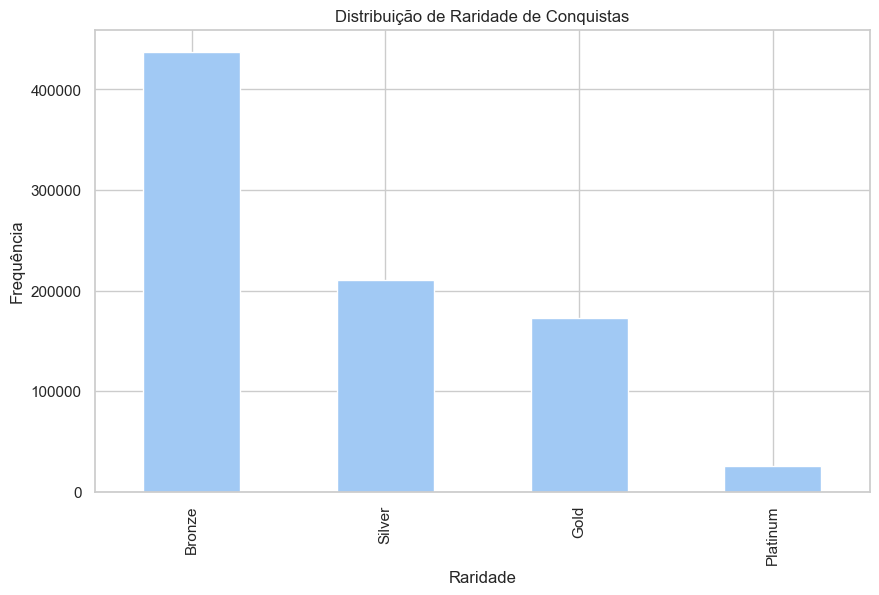

In [58]:
plt.figure(figsize=(10, 6))
playstation_achievements['rarity'].value_counts().plot(kind='bar')
plt.title('Distribuição de Raridade de Conquistas')
plt.xlabel('Raridade')
plt.ylabel('Frequência')
plt.show()


##### • Tomada de decisão: Promoções baseadas na raridade das conquistas  
##### • Métricas: Ofertas para DLCs e jogos da mesma franquia. 15% de conversão em compras de DLC entre os jogadores-alvo

## Tomada de decisão 5: Promover Jogos Antigos com Baixa Penetração

In [59]:
from datetime import datetime

xbox_purchased_exploded = xbox_purchased_games.explode('library')

old_games = xbox_games[
    (datetime.now() - pd.to_datetime(xbox_games['release_date'])).dt.days > 730
]
old_games_purchases = old_games.merge(
    xbox_purchased_exploded,
    left_on='gameid',
    right_on='library',
    how='left'
)
underutilized_games = old_games_purchases.groupby('title')['library'].count()\
                                          .reset_index(name='compras')\
                                          .query('compras < 100')\
                                          .sort_values('compras')
print(underutilized_games.to_markdown(index=False))

| title                                                              |   compras |
|:-------------------------------------------------------------------|----------:|
| Where's Waldo?                                                     |         1 |
| My Universe - Fashion Boutique                                     |         1 |
| Tani Masaki's Golfercise                                           |         2 |
| Conway: Disappearance at Dahlia View                               |         3 |
| Tennis Manager 2021                                                |         4 |
| NBA Playgrounds 2                                                  |         4 |
| Saraiva Player                                                     |         4 |
| Attack of the Movies                                               |         5 |
| Looke                                                              |         5 |
| Noble Armada: Lost Worlds                                          |         6 |
| Ka

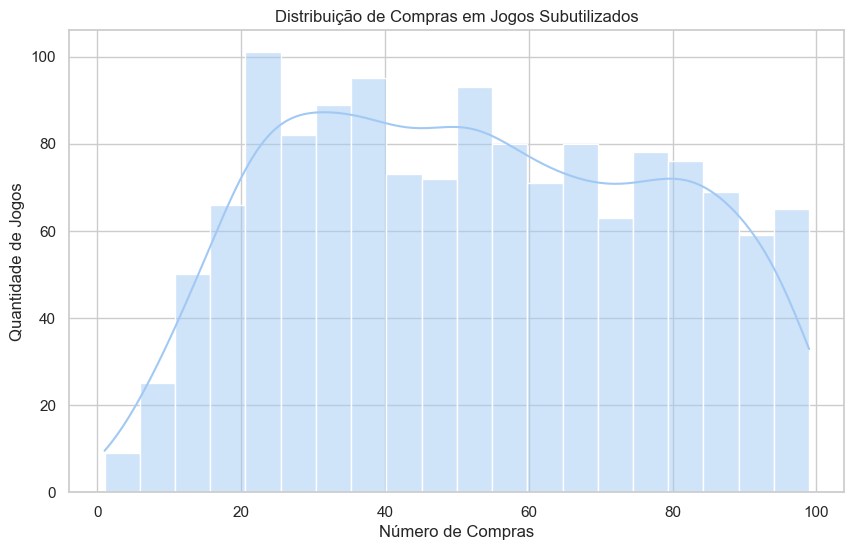

In [60]:
plt.figure(figsize=(10, 6))
sn.histplot(underutilized_games['compras'], bins=20, kde=True)
plt.title('Distribuição de Compras em Jogos Subutilizados')
plt.xlabel('Número de Compras')
plt.ylabel('Quantidade de Jogos')
plt.show()

##### • Tomada de decisão: Identificar jogos com +2 anos e poucas vendas para incluir promoções  
##### • Métricas: Aumentar vendas em 300% com descontos direcionados  